In [2]:
import sys

sys.path.append("../../")

import QuantLib as ql
import ron.QuantLib.YieldCurve as yc

Market data

In [3]:
terms = [
    "1y",
    "2y",
    "3y",
    "4y",
    "5y",
    "6y",
    "7y",
    "8y",
    "9y",
    "10y",
    "12y",
    "15y",
    "20y",
    "25y",
    "30y",
]

rates = [
    2.70e-2,
    2.75e-2,
    2.80e-2,
    3.00e-2,
    3.36e-2,
    3.68e-2,
    3.97e-2,
    4.24e-2,
    4.50e-2,
    4.75e-2,
    4.75e-2,
    4.70e-2,
    4.50e-2,
    4.30e-2,
    4.30e-2,
]

In [4]:
fwdRateYC = yc.YieldCurve(
    terms, rates, day_counter=ql.Actual360(), interpolation=ql.BackwardFlat())
print(fwdRateYC.table())

Terms           Dates   Rates
0     1y  July 6th, 2020   0.027
1     2y  July 5th, 2021   0.027
2     3y  July 4th, 2022  0.0275
3     4y  July 4th, 2023   0.028
4     5y  July 4th, 2024    0.03
5     6y  July 4th, 2025  0.0336
6     7y  July 6th, 2026  0.0368
7     8y  July 5th, 2027  0.0397
8     9y  July 4th, 2028  0.0424
9    10y  July 4th, 2029   0.045
10   12y  July 4th, 2030  0.0475
11   15y  July 5th, 2032  0.0475
12   20y  July 4th, 2035   0.047
13   25y  July 4th, 2040   0.045
14   30y  July 4th, 2045   0.043
15  None  July 4th, 2050   0.043


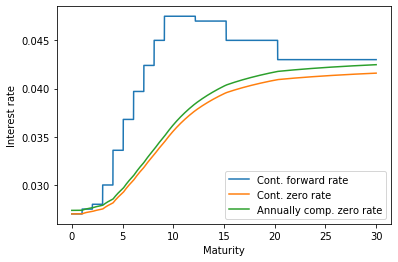

In [5]:
fwdRateYC.plot(1.0 / 365)

In [6]:
today = ql.Settings.getEvaluationDate(ql.Settings.instance())
print("Today: " + str(today))
calendar = ql.TARGET()
period = ql.Period("500d")
bdc = ql.Following
print(str(calendar) + ", " + str(period) + ", " + str(bdc))
maturity = calendar.advance(today, period, bdc)
print("Maturity: " + str(maturity))
discountFactor = fwdRateYC.discount(maturity)
print("Discount: " + str(discountFactor))



Today: July 4th, 2020
TARGET calendar, 71W3D, 0
Maturity: June 13th, 2022
Discount: 0.9479046244686883


Example plot of 10 data points interpolated using the various types of interpolation in Quantlib:

&nbsp;
<img src="quantlib-interpolation-methods.png">

In [7]:
today = ql.Date(30, 10, 2019)
ql.Settings.instance().evaluationDate = today  
settlementDate = ql.TARGET().advance(today, ql.Period(2, ql.Days))

rts = [0.03145, 0.03145, 0.0278373626373627, 0.0253076923076923, 0.0249373626373629]
dts = [settlementDate, ql.Date(1,2,2020), ql.Date(1,5,2020), ql.Date(1,8,2020), ql.Date(1,11,2020)]
c = ql.ForwardCurve(dts, rts, ql.Actual360(), ql.NullCalendar(), ql.BackwardFlat())
df = [c.discount(d) for d in dts]
print(df)

[1.0, 0.9919949898918935, 0.9851153255552918, 0.9787646299045335, 0.9725469122728971]
